In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import glob
files = glob.glob('datas/*1hz*.txt')

def time_of_file(file_name):
    idx1 = file_name.index('(')
    idx2 = file_name.index(')')
    idx3 = file_name.index('-',idx1,idx2)
    idx4 = file_name.rindex('-',idx1,idx2)
    h = int(file_name[idx1+1:idx3])
    m = int(file_name[idx3+1:idx4])
    s = int(file_name[idx4+1:idx2])
    return (h,m,s)

files.sort(key = time_of_file)

In [12]:
files

['datas\\dl_G345_1hz_2.1kn2017-8-16(11-17-18).txt',
 'datas\\dl_G345_1hz_4.2kn2017-8-16(11-27-50).txt',
 'datas\\dl_G345_1hz_8.4kn2017-8-16(11-45-46).txt',
 'datas\\dl_G345_1hz_8.4kn_22017-8-16(12-2-58).txt',
 'datas\\dl_G345_1hz_11.2kn2017-8-16(15-4-50).txt',
 'datas\\dl_G345_1hz_12.6kn2017-8-16(15-23-1).txt',
 'datas\\dl_G345_1hz_14.2kn2017-8-16(15-42-22).txt']

In [13]:
cols=['时间','振次','轴位移','力','应力','变形','侧位移','围压','孔压','反压','体变','小体变']
temp_df = pd.DataFrame(columns=cols)

In [14]:
for file in files:
    df = pd.read_table(file, encoding='gb2312')
    df.columns=cols
    temp_df = pd.concat([temp_df,df],ignore_index=True)
    
temp_df.drop(['侧位移','体变','小体变','应力'],1,inplace=True)
temp_df.dropna(inplace=True)
temp_df.to_csv('1hz.csv',index=False)

In [5]:
df = pd.read_csv('1hz.csv',encoding='gb2312')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329635 entries, 0 to 329634
Data columns (total 8 columns):
时间     329635 non-null float64
振次     329635 non-null float64
轴位移    329635 non-null float64
力      329635 non-null float64
变形     329635 non-null float64
围压     329635 non-null float64
孔压     329635 non-null float64
反压     329635 non-null float64
dtypes: float64(8)
memory usage: 20.1 MB


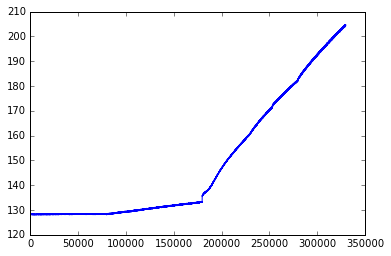

In [16]:
plt.plot(df['轴位移'])

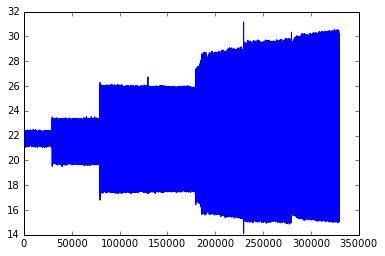

In [17]:
plt.plot(df['力'])

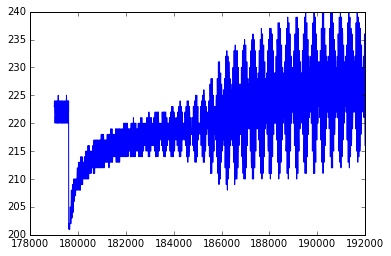

In [14]:
plt.plot(df['孔压'][179000:192000])

In [16]:
df['力'][180000:192000].max(),df['力'][180000:192000].min()

(28.739999999999998, 15.6)

In [17]:
6000/50

120.0